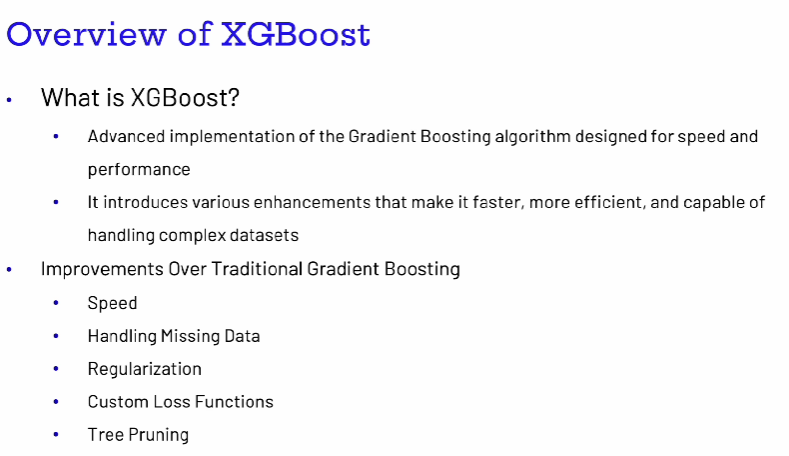
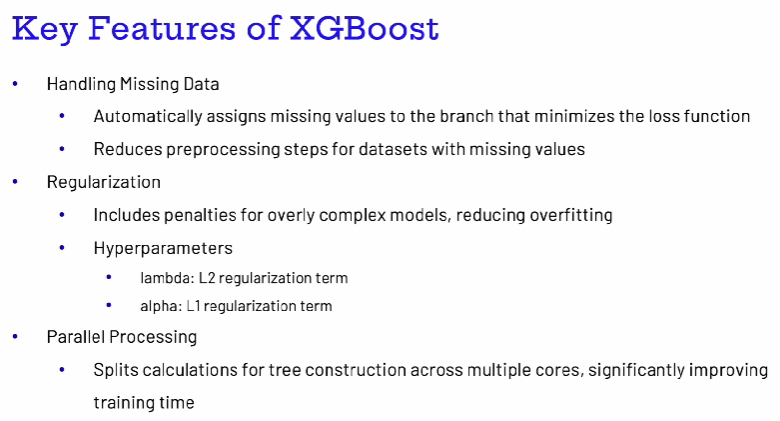
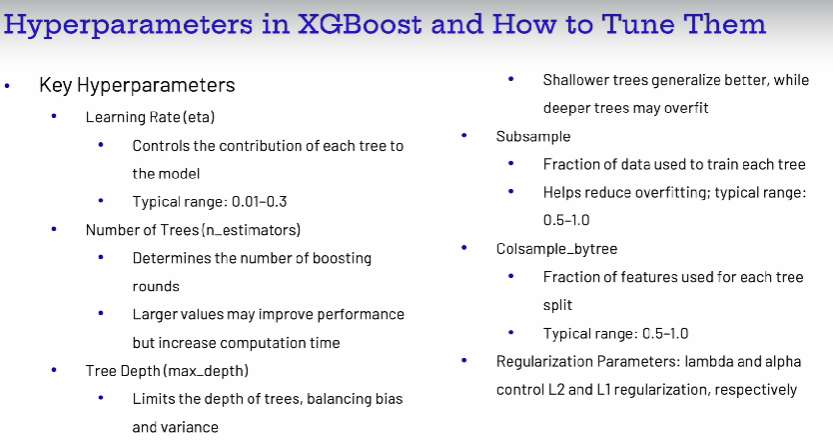

In [1]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/56.8 MB 1.4 MB/s eta 0:00:40
    --------------------------------------- 1.0/56.8 MB 1.7 MB/s eta 0:00:33
   - -------------------------------------- 1.6/56.8 MB 2.0 MB/s eta 0:00:28
   - -------------------------------------- 2.1/56.8 MB 2.1 MB/s eta 0:00:26
   - -------------------------------------- 2.6/56.8 MB 2.4 MB/s eta 0:00:23
   -- ------------------------------------- 3.7/56.8 MB 2.7 MB/s eta 0:00:20
   --- ------------------------------------ 4.5/56.8 MB 2.9 MB/s eta 0:00:19
   --- ------------------------------------ 5.5/56.8 MB 3.2 MB/s eta 0:00:17
   ---- ----------------------------------- 6.3/56.8 MB 3.2 MB/s eta 0:00:16
   ---- ----------------------------------- 7.1/56.8 MB 3.3 MB/s eta 0:00:16
   ----- -----------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report 

In [5]:
data = load_breast_cancer()
x,y = data.data , data.target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
# converting the dataset into DMatrix format as it is required by XGBoost and it is one of the best suitated 
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [11]:
params ={
    'objective': 'binary:logistic',
    'eval_metric':'logloss',
    'max_depth':3,   
    'eta':0.1
}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

y_pred =(xgb_model.predict(dtest)>0.5).astype(int)

In [12]:
accuracy_score(y_test,y_pred)

0.956140350877193

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
from xgboost import XGBClassifier

In [17]:
# DEFINE THE HYPER PARAMETER GRID 
param_grid ={
    'learning_rate':[0.01,0.1,0.2],
    'n_estimators':[50,100,200],
    'max_depth':[3,5,6],
    'subsample':[0.8,1.0],
    'colsample_bytree':[0.8,1.0]
}
# initialize xg boot 

xgb_clf = XGBClassifier(user_label_endcode=False, eval_metric='logloss', random_state=42)
xgb_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)   

In [18]:
xgb_search.fit(x_train, y_train)
xgb_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


e:\pythonAi\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:03:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "user_label_endcode" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 50,
 'subsample': 0.8}

In [19]:
xgb_search.best_score_

np.float64(0.9736406413384455)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(x_train, y_train)
y_pred = gb_model.predict(x_test)

In [23]:
#evaluate gradient boosting performance 
accuracy_score(y_test, y_pred)

0.956140350877193